<h1> Web Scraping Stock Price using yfinance <h1>

Main objectives:
- Using pd.read_html
- Clean data
- Using yfinance 
- Visualize data by plotting graph
- Create a function for different company

## Obtain data 

In [43]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url, header=0) #first row is header
df = tables[0]  #Get the first table 
df

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
...,...,...,...,...,...,...,...,...,...
500,YUM,Yum! Brands,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
501,ZBRA,Zebra,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
502,ZBH,Zimmer Biomet,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [44]:
# Count how many companies for each sector
df.groupby('GICS Sector')['GICS Sector'].count()

GICS Sector
Communication Services    27
Consumer Discretionary    60
Consumer Staples          32
Energy                    21
Financials                67
Health Care               65
Industrials               73
Information Technology    74
Materials                 28
Real Estate               29
Utilities                 29
Name: GICS Sector, dtype: int64

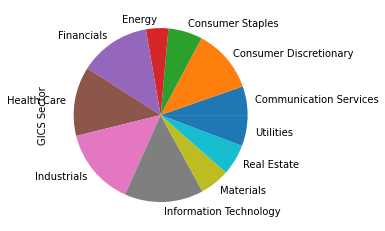

In [45]:
df.groupby('GICS Sector')['GICS Sector'].count().plot(kind='pie')

In [46]:
# Groupby sector 
sectors = df.groupby('GICS Sector')
sectors.first() #Show first company for each sector

,Symbol,Security,SEC filings,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
GICS Sector,,,,,,,,
Communication Services,ATVI,Activision Blizzard,reports,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
Consumer Discretionary,AAP,Advance Auto Parts,reports,Automotive Retail,"Raleigh, North Carolina",2015-07-09,1158449,1932
Consumer Staples,ADM,ADM,reports,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
Energy,APA,APA Corporation,reports,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,6769,1954
Financials,AFL,Aflac,reports,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott,reports,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
Industrials,MMM,3M,reports,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
Information Technology,ACN,Accenture,reports,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products,reports,Industrial Gases,"Allentown, Pennsylvania",1985-04-30,2969,1940


In [47]:
# Summary statistics
sectors.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  27.0  1.107343e+06  516013.007250  18926.0  773272.50   
Consumer Discretionary  60.0  8.658420e+05  459208.678026  27419.0  759791.50   
Consumer Staples        32.0  3.872794e+05  564407.571740   7084.0   24213.00   
Energy                  21.0  7.674384e+05  619023.796823   4447.0   93410.00   
Financials              67.0  6.479864e+05  540894.391284   4962.0   71914.50   
Health Care             65.0  8.220182e+05  527683.613634   1800.0  313616.00   
Industrials             73.0  6.736877e+05  585966.514840   4281.0   77360.00   
Information Technology  74.0  9.209406e+05  510697.316741   2488.0  754287.50   
Materials               28.0  8.369064e+05  699182.236462   2969.0   67840.25   
Real Estate             29.0  8.957202e+05  327862.587502  34903.0  783280.00   
Utilities               29.0  8.402204e+05  467422.045064   4904.0  731802.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1166691.0  1500907.50  1754301.0  
Consumer Discretionary   921249.0  1161339.25  1590895.0  
Consumer Staples          70615.0   789573.00  1679273.0  
Energy                   858470.0  1163165.00  1701605.0  
Financials               759944.0  1123260.50  1601712.0  
Health Care              879169.0  1099800.00  1821825.0  
Industrials              746515.0  1067701.00  1783180.0  
Information Technology   949462.5  1349367.25  1730168.0  
Materials                915994.5  1419355.00  1755672.0  
Real Estate              920522.0  1053507.00  1393311.0  
Utilities                874761.0  1047862.00  1868275.0

In [48]:
sectors.get_group('Information Technology')

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
8,ADBE,Adobe,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949
16,AKAM,Akamai,reports,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998
29,AMD,AMD,reports,Information Technology,Semiconductors,"Santa Clara, California",NaN,2488,1969
...,...,...,...,...,...,...,...,...,...
458,TYL,Tyler Technologies,reports,Information Technology,Application Software,"Plano, Texas",2020-06-22,860731,1966
473,VRSN,Verisign,reports,Information Technology,Internet Services & Infrastructure,"Dulles, Virginia",2006-02-01,1014473,1995
479,V,Visa,reports,Information Technology,Data Processing & Outsourced Services,"San Francisco, California",2009-12-21,1403161,1958
491,WDC,Western Digital,reports,Information Technology,"Technology Hardware, Storage & Peripherals","San Jose, California",2009-07-01,106040,1970


## Retrieve stock price from yfinance

In [34]:
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 7.5 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [49]:
data = yf.download(tickers=list(df.Symbol), period="ytd", interval="1d", group_by='ticker', auto_adjust=True, prepost=True, threads=True, proxy=None)
#period from beginning of the year, group_by ticker (access data data['stocksymbol]), 

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted


In [50]:
data['AAPL']

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-03,177.603723,182.647300,177.483880,181.778397,104487900
2022-01-04,182.397624,182.707227,178.892080,179.471344,99310400
2022-01-05,179.381453,179.940738,174.417776,174.697418,94537600
2022-01-06,172.480249,175.076947,171.421601,171.781143,96904000
2022-01-07,172.670013,173.918422,170.812379,171.950928,86580100
2022-01-10,168.864858,172.280505,167.956012,171.970901,106765600
2022-01-11,172.100741,174.957087,170.602650,174.857224,76138300
2022-01-12,175.895886,176.954535,174.597553,175.306641,74805200
2022-01-13,175.556330,176.395257,171.571401,171.970901,84505800


In [51]:
len(data['AAPL'])

43

In [56]:
# Create Apple dataframe and set Date as index
AAPLdf = pd.DataFrame(data['AAPL'].Close)
AAPLdf['Date'] = AAPLdf.index
AAPLdf

,Close,Date
Date,,
2022-01-03,181.778397,2022-01-03
2022-01-04,179.471344,2022-01-04
2022-01-05,174.697418,2022-01-05
2022-01-06,171.781143,2022-01-06
2022-01-07,171.950928,2022-01-07
2022-01-10,171.970901,2022-01-10
2022-01-11,174.857224,2022-01-11
2022-01-12,175.306641,2022-01-12
2022-01-13,171.970901,2022-01-13


## Plot the AAPL closing price

In [57]:
#Summary statistics
AAPLdf.describe()

,Close
count,43.000000
mean,169.259798
std,5.685482
min,159.017410
25%,164.585007
50%,170.113266
75%,172.819893
max,181.778397


(array([738156., 738163., 738170., 738177., 738187., 738194., 738201.,
        738208., 738215.]), <a list of 9 Text major ticklabel objects>)

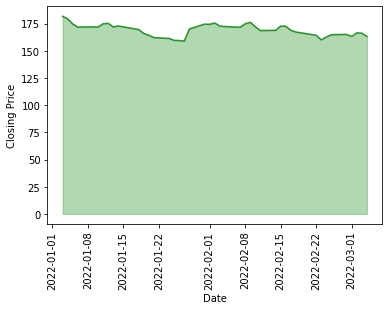

In [62]:
import matplotlib.pyplot as plt
plt.fill_between(AAPLdf.Date, AAPLdf.Close, color='green', alpha=0.3)
plt.plot(AAPLdf.Date, AAPLdf.Close, color='green', alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.xticks(rotation=90)

## Make a function for plotting graph

In [65]:
def plot_price(symbol):
  df = pd.DataFrame(data[symbol].Close)
  df['Date'] = df.index
  plt.fill_between(df.Date, df.Close, color='blue', alpha=0.3)
  plt.plot(df.Date, df.Close, color='blue', alpha=0.8)
  plt.xlabel("Date")
  plt.ylabel("Closing Price")
  plt.xticks(rotation=90)
  plt.title(symbol)
  return plt.show()

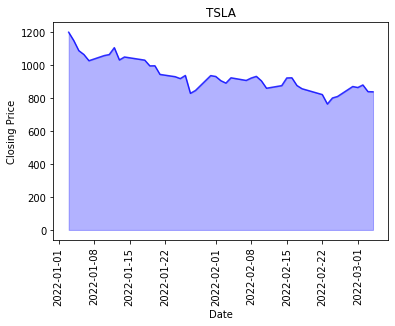

In [66]:
plot_price('TSLA')

In [70]:
corre = data['AAPL'].corr()
corre

,Open,High,Low,Close,Volume
Open,1.000000,0.955163,0.970285,0.863474,-0.495513
High,0.955163,1.000000,0.970119,0.949444,-0.384881
Low,0.970285,0.970119,1.000000,0.933330,-0.530256
Close,0.863474,0.949444,0.933330,1.000000,-0.344794
Volume,-0.495513,-0.384881,-0.530256,-0.344794,1.000000


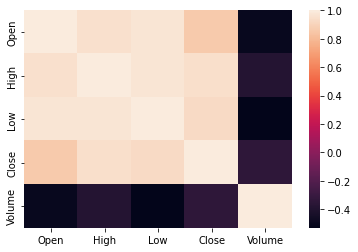

In [71]:
import seaborn as sns
sns.heatmap(corre)